In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from pandas_profiling import ProfileReport

from sklearn.ensemble import BaggingClassifier

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%autosave 60

Autosaving every 60 seconds


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
# dropping duplicates

df1 = df.drop_duplicates()
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
X = df1.drop(['quality'], axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [6]:
Y = df1.quality
Y

0       5
1       5
2       5
3       6
5       5
       ..
1593    6
1594    5
1595    6
1597    5
1598    6
Name: quality, Length: 1359, dtype: int64

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)

## # BaggingClassifier() :

- ### A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. 
- ### Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

- This algorithm encompasses several works from the literature. When random subsets of the dataset are drawn as random subsets of the samples, then this algorithm is known as **Pasting**.
- If samples are drawn with replacement, then the method is known as Bagging [2]. When random subsets of the dataset are drawn as random subsets of the features, then the method is known as **Random Subspaces**. 
- Finally, when base estimators are built on subsets of both samples and features, then the method is known as **Random Patches**.

### A bag of multiple `decision trees`:

In [8]:
dt_bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5, random_state=0)
dt_bag

## n_estimators = number of decision trees in a bag

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5,
                  random_state=0)

In [9]:
dt_bag.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5,
                  random_state=0)

In [10]:
dt_bag.base_estimator

DecisionTreeClassifier()

In [11]:
dt_bag.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [12]:
dt_bag.estimator_params

### We havn't set any params, neither we've have done any kinda hyperparameter tuning.

()

In [13]:
## Scores:

print("train_score: ", dt_bag.score(x_train, y_train))
print("test_score: ", dt_bag.score(x_test, y_test))

### bluntly overfitting

train_score:  0.9421000981354269
test_score:  0.4764705882352941


In [14]:
dt_bag.predict(x_test)

array([5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 7, 6, 5, 6, 4, 6, 6, 5,
       6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 7, 6, 5, 5, 5, 6, 5,
       6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 7, 5, 4, 6, 7, 5, 5, 7, 5, 5, 5,
       6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 7, 7, 6, 6, 5, 6,
       5, 4, 6, 6, 5, 6, 5, 4, 7, 5, 6, 5, 6, 6, 7, 6, 5, 5, 6, 5, 6, 5,
       5, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6,
       6, 5, 5, 6, 7, 6, 6, 6, 5, 5, 6, 5, 5, 6, 4, 5, 5, 7, 6, 5, 5, 6,
       5, 5, 7, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 7, 6, 6,
       6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 6, 7, 5, 5, 6, 5, 5, 6, 6, 6,
       6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 6, 7, 6,
       5, 6, 5, 5, 7, 6, 5, 6, 5, 6, 6, 7, 5, 7, 5, 5, 6, 5, 5, 5, 5, 6,
       5, 5, 7, 6, 6, 6, 6, 6, 6, 5, 6, 4, 6, 5, 5, 7, 7, 6, 5, 5, 5, 6,
       5, 5, 7, 5, 6, 5, 5, 6, 5, 7, 6, 6, 5, 6, 5, 7, 6, 5, 6, 6, 6, 5,
       6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 7,

### A bag of multiple `KNearestNeighbours`:

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn_bag = BaggingClassifier(KNeighborsClassifier(6), n_estimators=10)
knn_bag.fit(x_train, y_train)
knn_bag

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=6))

In [16]:
knn_bag.predict(x_test)

array([7, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 7, 6, 5, 6, 5, 5, 6, 5,
       6, 5, 6, 6, 7, 6, 5, 5, 5, 5, 5, 6, 7, 6, 5, 5, 6, 5, 5, 6, 6, 5,
       6, 5, 6, 6, 6, 6, 7, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 7, 5, 5, 5,
       5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6,
       5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5,
       6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 7, 5, 6, 5, 5, 6, 5, 7,
       6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 7, 6, 5,
       7, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 7, 6, 5,
       5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6,
       6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 5, 4, 5, 5, 6, 7, 5, 5, 6, 6,
       7, 5, 5, 5, 7, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 7,
       5, 5, 8, 5, 5, 5, 5, 6, 6, 6, 6, 7, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6,
       6, 5, 6, 5, 5, 7, 5, 5, 5, 6, 6, 6, 6, 5, 5,

In [17]:
## Scores:

print("train_score: ", knn_bag.score(x_train, y_train))
print("test_score: ", knn_bag.score(x_test, y_test))

train_score:  0.6280667320902846
test_score:  0.4764705882352941


### # Can a `bagging of decision trees` be called `Random Forest`?

**Random forests differ from bagged trees by forcing the tree to use only a subset of its available predictors to split on in the growing phase.** All the decision trees that make up a random forest are different because each tree is built on a different random subset of data.

- ### Random forest is an enhanced version of `bagging` which is essentailly an ensemble of decsion tress trained w a bagging mechanism.
- ### The concept of the Random forests is to build multiple decision trees and aggregate them to get an accurate result with as little bias as possible.
- ### The Random forest algo is very robust against `overfitting` and on top of it, good w `unbalanceed` and `missing data`.

## # Random Forest :

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf = RandomForestClassifier(n_estimators=5)
rf

RandomForestClassifier(n_estimators=5)

In [20]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5)

### Random forest score of 5 decision trees:

In [21]:
print("training_score: ", rf.score(x_train, y_train))
print("test_score: ", rf.score(x_test, y_test))

training_score:  0.943081452404318
test_score:  0.5617647058823529


### v/s BaggingClassifier score of 5 decsion trees:

In [22]:
print("train_score: ", dt_bag.score(x_train, y_train))
print("test_score: ", dt_bag.score(x_test, y_test))

train_score:  0.9421000981354269
test_score:  0.4764705882352941


In [23]:
rf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1190423181),
 DecisionTreeClassifier(max_features='auto', random_state=1004262060),
 DecisionTreeClassifier(max_features='auto', random_state=90093579),
 DecisionTreeClassifier(max_features='auto', random_state=1474539988),
 DecisionTreeClassifier(max_features='auto', random_state=2121351614)]

[Text(0.3352678571428571, 0.9791666666666666, 'X[9] <= 0.555\ngini = 0.651\nsamples = 646\nvalue = [9, 45, 437, 392, 126, 10]'),
 Text(0.12445652173913044, 0.9375, 'X[10] <= 11.15\ngini = 0.51\nsamples = 193\nvalue = [4, 16, 206, 88, 7, 0]'),
 Text(0.06692546583850932, 0.8958333333333334, 'X[1] <= 0.415\ngini = 0.438\nsamples = 165\nvalue = [4, 14, 198, 58, 2, 0]'),
 Text(0.024844720496894408, 0.8541666666666666, 'X[8] <= 3.275\ngini = 0.49\nsamples = 23\nvalue = [0, 0, 15, 20, 0, 0]'),
 Text(0.014906832298136646, 0.8125, 'X[1] <= 0.33\ngini = 0.375\nsamples = 11\nvalue = [0, 0, 12, 4, 0, 0]'),
 Text(0.009937888198757764, 0.7708333333333334, 'X[6] <= 62.5\ngini = 0.32\nsamples = 3\nvalue = [0, 0, 1, 4, 0, 0]'),
 Text(0.004968944099378882, 0.7291666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 4, 0, 0]'),
 Text(0.014906832298136646, 0.7291666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.01987577639751553, 0.7708333333333334, 'gini = 0.0\nsamples = 8

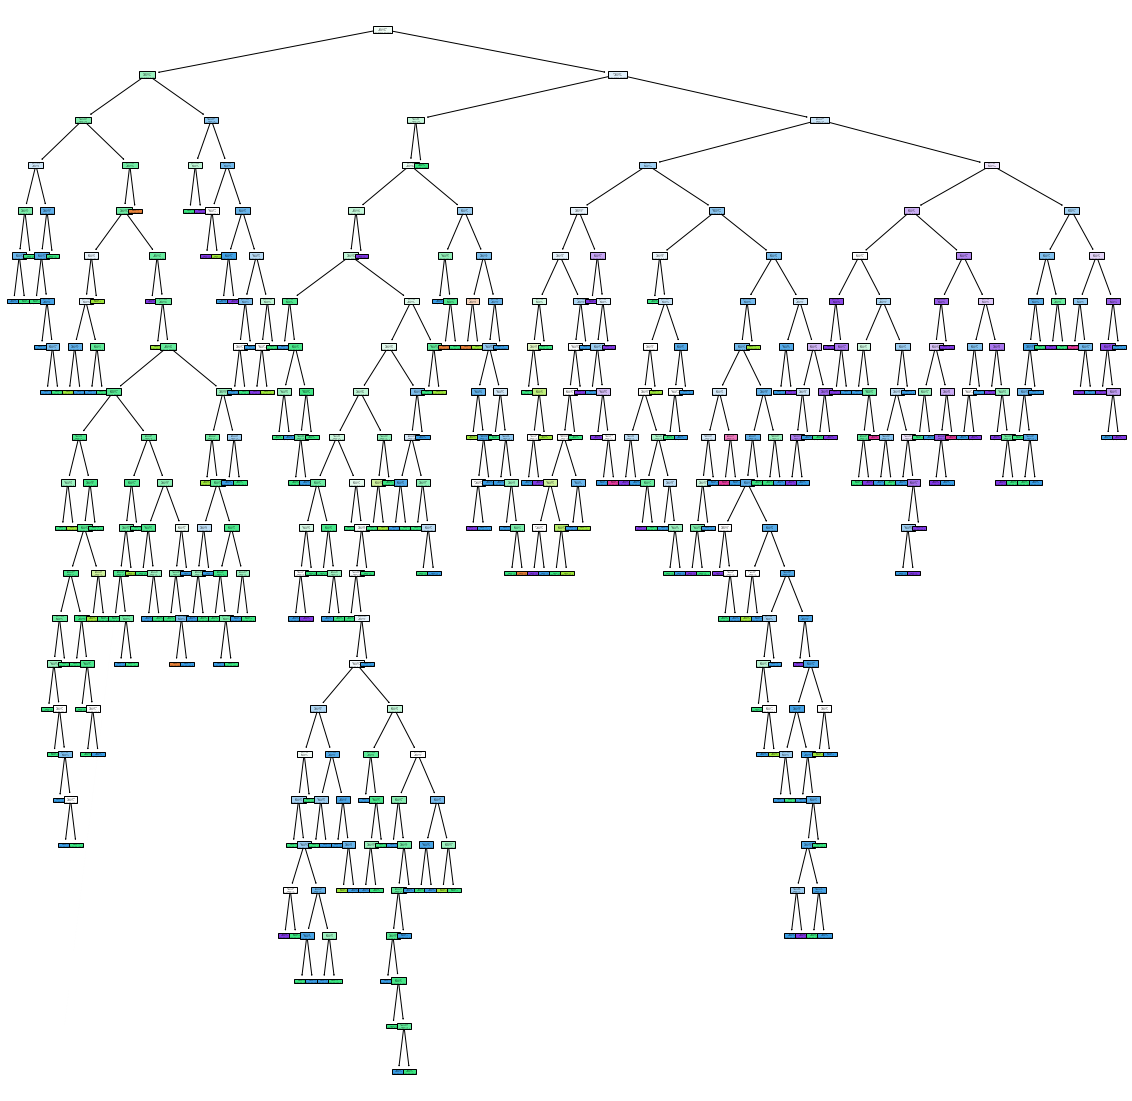

In [24]:
plt.figure(figsize = (20, 20))
tree.plot_tree(rf.estimators_[0], filled=True)

[Text(0.38886928882361266, 0.9761904761904762, 'X[4] <= 0.069\ngini = 0.642\nsamples = 628\nvalue = [5, 41, 404, 438, 120, 11]'),
 Text(0.08113763448471122, 0.9285714285714286, 'X[8] <= 3.14\ngini = 0.613\nsamples = 152\nvalue = [2, 12, 47, 150, 52, 4]'),
 Text(0.013590033975084938, 0.8809523809523809, 'X[3] <= 1.45\ngini = 0.5\nsamples = 9\nvalue = [0, 0, 9, 4, 1, 0]'),
 Text(0.009060022650056626, 0.8333333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 2, 0, 0]'),
 Text(0.01812004530011325, 0.8333333333333334, 'X[6] <= 23.0\ngini = 0.403\nsamples = 8\nvalue = [0, 0, 9, 2, 1, 0]'),
 Text(0.009060022650056626, 0.7857142857142857, 'X[1] <= 0.325\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 0, 1, 1, 0]'),
 Text(0.004530011325028313, 0.7380952380952381, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0]'),
 Text(0.013590033975084938, 0.7380952380952381, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'),
 Text(0.027180067950169876, 0.7857142857142857, 'X[10] <= 11.1\ngini = 0.18\

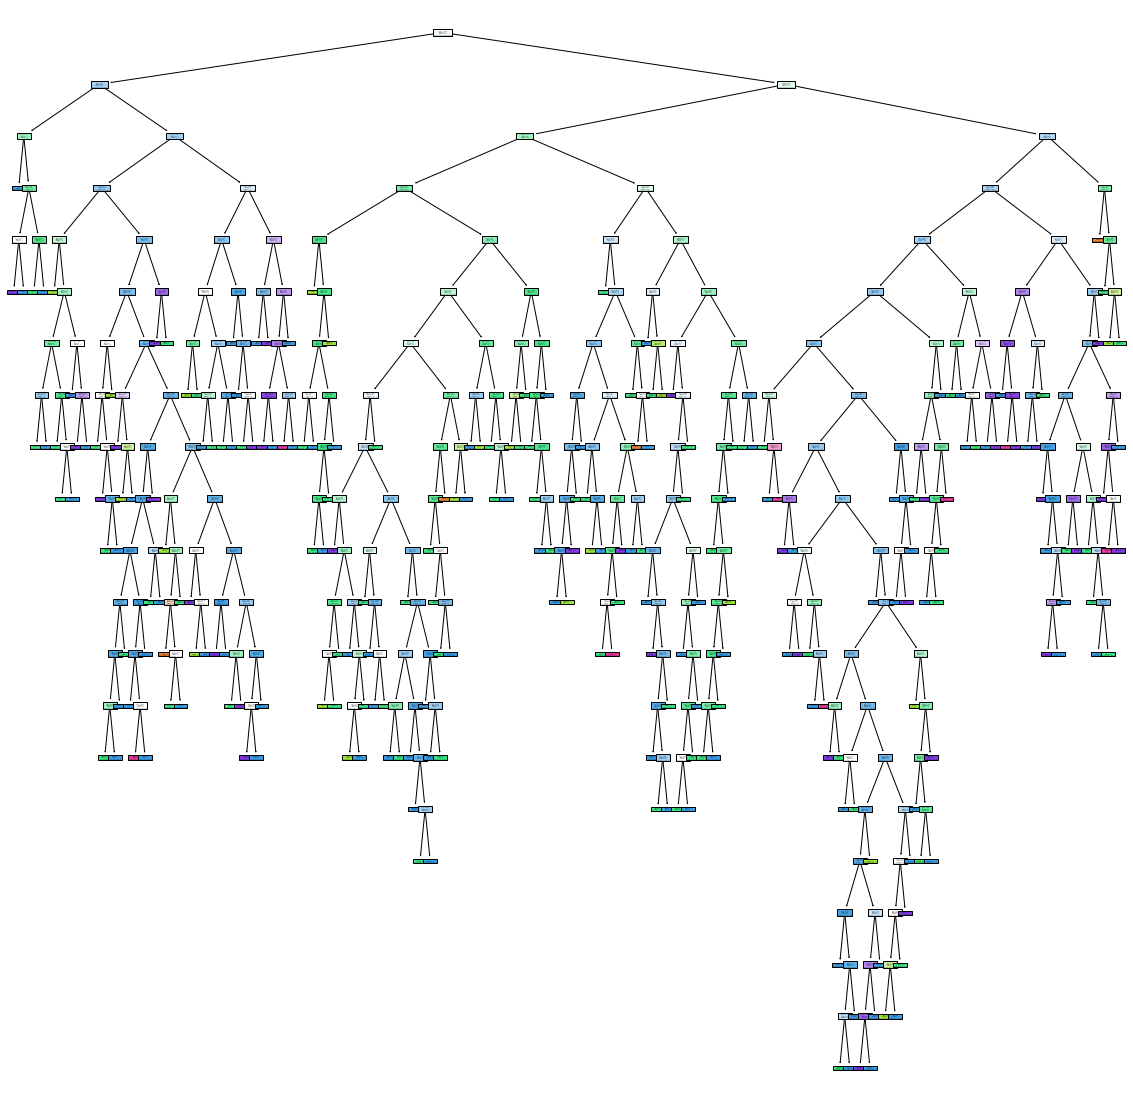

In [25]:
plt.figure(figsize = (20, 20))
tree.plot_tree(rf.estimators_[1], filled=True)

### `random forest` is trying to build each model on `different subset of training set` provided by us

### # disadvantage: It's `hard to interpret` how the sampling of records is done or in simple words, how many records are given to each model to build a decision tree.

[[Text(0.3352678571428571, 0.9791666666666666, 'X[9] <= 0.555\ngini = 0.651\nsamples = 646\nvalue = [9, 45, 437, 392, 126, 10]'),
  Text(0.12445652173913044, 0.9375, 'X[10] <= 11.15\ngini = 0.51\nsamples = 193\nvalue = [4, 16, 206, 88, 7, 0]'),
  Text(0.06692546583850932, 0.8958333333333334, 'X[1] <= 0.415\ngini = 0.438\nsamples = 165\nvalue = [4, 14, 198, 58, 2, 0]'),
  Text(0.024844720496894408, 0.8541666666666666, 'X[8] <= 3.275\ngini = 0.49\nsamples = 23\nvalue = [0, 0, 15, 20, 0, 0]'),
  Text(0.014906832298136646, 0.8125, 'X[1] <= 0.33\ngini = 0.375\nsamples = 11\nvalue = [0, 0, 12, 4, 0, 0]'),
  Text(0.009937888198757764, 0.7708333333333334, 'X[6] <= 62.5\ngini = 0.32\nsamples = 3\nvalue = [0, 0, 1, 4, 0, 0]'),
  Text(0.004968944099378882, 0.7291666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 4, 0, 0]'),
  Text(0.014906832298136646, 0.7291666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
  Text(0.01987577639751553, 0.7708333333333334, 'gini = 0.0\nsa

<Figure size 1440x1440 with 0 Axes>

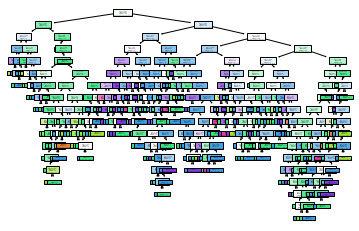

In [26]:
plt.figure(figsize=(20,20))
plt.subplots()

[tree.plot_tree(i, filled=True) for i in rf.estimators_]

### # Manual hyperparameter tuning of ccp_alphas: 

In [27]:
### Score of the baseline model

rf.score(x_test, y_test)

0.5617647058823529

In [28]:
alphas = np.arange(0, 0.2, .02)
alphas

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18])

In [29]:
training_scores = []
test_scores = []

for i in alphas:
    rf_mod = RandomForestClassifier(ccp_alpha=i)
    rf_mod.fit(x_train, y_train)
    training_scores.append(rf_mod.score(x_train, y_train))
    test_scores.append(rf_mod.score(x_test, y_test))

In [30]:
training_scores

[1.0,
 0.5878312070657508,
 0.5760549558390579,
 0.5691854759568205,
 0.4239450441609421,
 0.4239450441609421,
 0.4239450441609421,
 0.4239450441609421,
 0.4239450441609421,
 0.4239450441609421]

In [31]:
test_scores

[0.5529411764705883,
 0.5352941176470588,
 0.5264705882352941,
 0.5235294117647059,
 0.4264705882352941,
 0.4264705882352941,
 0.4264705882352941,
 0.4264705882352941,
 0.4264705882352941,
 0.4264705882352941]

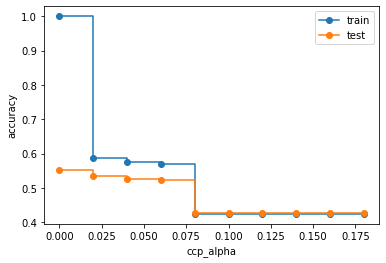

In [32]:
fig, ax = plt.subplots()
ax.set_xlabel("ccp_alpha")
ax.set_ylabel("accuracy")

ax.plot(alphas, training_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(alphas, test_scores, marker='o', label='test', drawstyle='steps-post')

ax.legend()
plt.show()

### from the plot we can make inference that `0.06` would be the best value  of ccp_alpha.

In [42]:
rf1 = RandomForestClassifier(ccp_alpha=0.06)

# fittting the dataset
rf1.fit(x_train, y_train)

# scores
print("training score: ", rf1.score(x_train, y_train))
print("test score: ", rf1.score(x_test, y_test))

training score:  0.5691854759568205
test score:  0.5235294117647059


In [43]:
### Initial scores:

rf.score(x_test, y_test)

0.5617647058823529

### Although, the accuracy decreased but model stabilized and now there's way less `overfitting`.

## # `Hyperparameter tuning` using GridSeacrhCV :

In [44]:
RandomForestClassifier()

RandomForestClassifier()

In [45]:
grid_params = {
    "n_estimators": [5, 10, 25, 50, 100, 150],
    "criterion": ['gini', 'entropy'],
    "max_depth": range(10),
#     "min_samples_split": range(2, 10),
    "min_samples_leaf": range(10)    
}

In [46]:
grid_rf = GridSearchCV(estimator=rf1, param_grid=grid_params, cv=10, n_jobs=-1, verbose=1)
grid_rf

GridSearchCV(cv=10, estimator=RandomForestClassifier(ccp_alpha=0.06), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10),
                         'n_estimators': [5, 10, 25, 50, 100, 150]},
             verbose=1)

In [47]:
grid_rf.fit(x_train, y_train)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2280 fits failed out of a total of 12000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees 

GridSearchCV(cv=10, estimator=RandomForestClassifier(ccp_alpha=0.06), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10),
                         'n_estimators': [5, 10, 25, 50, 100, 150]},
             verbose=1)

In [48]:
grid_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 3,
 'n_estimators': 10}

### # `Hyperparameter Tuning` will not necessarily increase the `accuracy of your model`, what it would certainly do is, 
- ### It will increase your `model stabilty` for sure.
- ### The resulting model will have `low variance` and `low bias`.
- ### And, the model would be way less `overfitted`.

In [49]:
rf_new = RandomForestClassifier(criterion='gini', ccp_alpha=0.06, max_depth=8, min_samples_leaf=4, n_estimators=50)
rf_new

RandomForestClassifier(ccp_alpha=0.06, max_depth=8, min_samples_leaf=4,
                       n_estimators=50)

In [50]:
rf_new.fit(x_train, y_train)

RandomForestClassifier(ccp_alpha=0.06, max_depth=8, min_samples_leaf=4,
                       n_estimators=50)

In [51]:
## Scores:

print("training score: ", rf_new.score(x_train, y_train))
print("test score: ", rf_new.score(x_test, y_test))

training score:  0.5623159960745829
test score:  0.5205882352941177


### `Hyperparameter Tuning` with all params altogether: 

In [54]:
rf_baseline = RandomForestClassifier()
rf_baseline

RandomForestClassifier()

In [55]:
grid_params1 = {
    "ccp_alpha": np.arange(0, 0.2, 0.02),
    "n_estimators": [5, 10, 25, 50, 100, 150],
    "criterion": ['gini', 'entropy'],
    "max_depth": range(10),
#     "min_samples_split": range(2, 10),
    "min_samples_leaf": range(10)    
}
grid_params1

{'ccp_alpha': array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18]),
 'n_estimators': [5, 10, 25, 50, 100, 150],
 'criterion': ['gini', 'entropy'],
 'max_depth': range(0, 10),
 'min_samples_leaf': range(0, 10)}

In [57]:
grid_rf1 = GridSearchCV(estimator=rf_baseline, param_grid=grid_params, cv=10, n_jobs=-1, verbose=1)
grid_rf1

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18]),
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10),
                         'n_estimators': [5, 10, 25, 50, 100, 150]},
             verbose=1)

In [58]:
grid_rf1.fit(x_train, y_train)

### taking hell lotta time

Fitting 10 folds for each of 12000 candidates, totalling 120000 fits


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
grid_rf1.best_params_